# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns   
from sklearn.preprocessing import StandardScaler

In [10]:
x_values = [17,51,27,21,36,48,19,26,54,30]
y_values = [10,1,5,9,4,2,9,6,0,3]

In [11]:
# Your code here. 
student_data = pd.DataFrame({'X': x_values, 'Y': y_values})

In [12]:
student_data

,X,Y
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

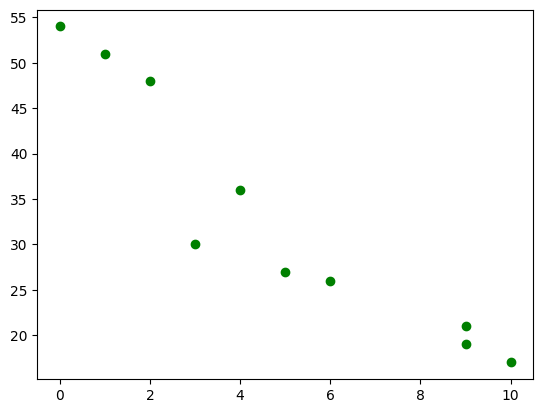

In [13]:
scatter_plot = plt.scatter(y_values, x_values, color='green')

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [14]:
'''
Podemos observar tienen una tendencia lineal negativa, es decir, a medida que aumenta el valor de x, el valor de y disminuye.
A simple vista podemos observar que la hipótesis de que a menor edad, mayor número de retrasos, se cumple.
'''

'\nPodemos observar tienen una tendencia lineal negativa, es decir, a medida que aumenta el valor de x, el valor de y disminuye.\nA simple vista podemos observar que la hipótesis de que a menor edad, mayor número de retrasos, se cumple.\n'

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [15]:
cm = student_data.corr()
cv= student_data.cov()
cm
# X e Y son inversamente proporcionales debido a su alta correlación negativa

,X,Y
X,1.000000,-0.939163
Y,-0.939163,1.000000


In [16]:
cv
# la covarianza 

,X,Y
X,187.655556,-45.566667
Y,-45.566667,12.544444


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [17]:
from sklearn.linear_model import LinearRegression as LinReg

In [18]:
# Your response here.
lr = LinReg()
lr.fit(student_data[['X']], student_data['Y'])

C:\Users\Álvaro\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Álvaro\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Álvaro\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Álvaro\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be rem

LinearRegression()

Plot your regression model on your scatter plot.

C:\Users\Álvaro\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Álvaro\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Álvaro\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


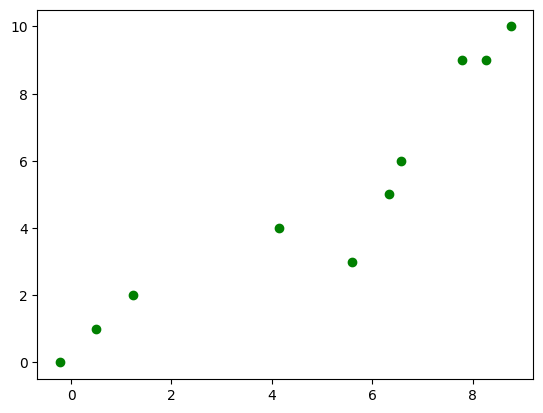

In [19]:
# Your code here.
scatter_plot = plt.scatter(lr.predict(student_data[['X']]), student_data['Y'], color='green')

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [3]:
# Con los datos arrojados por el modelo, podemos afirmas que, por norma general, la edad de los estudiantes es inversamente proporcional al número de retrasos que tienen.
# Los estudiantes más jóvenes tienen más retrasos que los estudiantes más mayores.

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [20]:
df = pd.read_csv('vehicles.csv')
df.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

<Axes: >

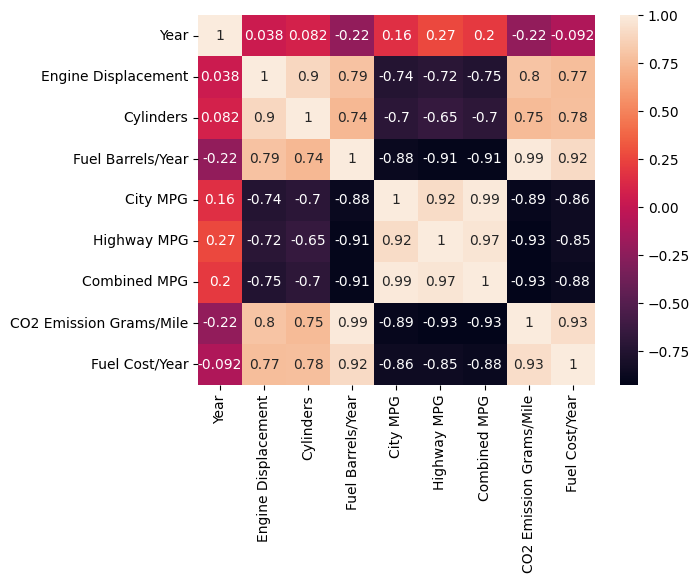

In [23]:
# Your response here. 
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True)

In [ ]:
'''
Podemos observar que las columnas Fuel Cost y Fuel Barrels/Year tienen una correlación muy alta, por lo que podemos afirmar que el consumo de combustible es directamente proporcional al coste del mismo.
Por otra parte, podemos observar que las columnas Fuel Cost y Combined MPG tienen una correlación negativa alta, por lo que podemos afirmar que el consumo de combustible es inversamente proporcional a las millas por galón.
El año no parece tener una correlación significativa con la columna objetivo
'''

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [29]:
# Your response here. 
from sklearn.tree import DecisionTreeRegressor as DTR
X = df.drop(columns = ['CO2 Emission Grams/Mile', 'Make', 'Model', 'Vehicle Class', 'Fuel Type', 'Drivetrain','Transmission'])
y = df['CO2 Emission Grams/Mile']

# Utilizaré un modelo de regresión de árbol de decisión para predecir la columna objetivo ya que se expuso un ejemplo similar en clase


In [30]:
dtr = DTR().fit(X, y) # inicializamos el modelo y lo fitteamos con los datos

C:\Users\Álvaro\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Álvaro\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Álvaro\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Álvaro\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be rem

In [31]:
sum(dtr.feature_importances_)

1.0

In [32]:
dict(zip(X.columns, dtr.feature_importances_*100))

{'Year': 0.01563968478827268,
 'Engine Displacement': 0.009644457036313435,
 'Cylinders': 0.002641092734267133,
 'Fuel Barrels/Year': 83.79902382625353,
 'City MPG': 0.030610858874426626,
 'Highway MPG': 0.015955461738215583,
 'Combined MPG': 16.03838730975361,
 'Fuel Cost/Year': 0.08809730882136976}

In [34]:
X_norm = StandardScaler().fit_transform(X)

dtr = DTR().fit(X_norm, y)

dict(zip(X.columns, dtr.feature_importances_*100))

C:\Users\Álvaro\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Álvaro\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Álvaro\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Álvaro\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be rem

{'Year': 0.016084006944116824,
 'Engine Displacement': 0.012301848380499627,
 'Cylinders': 0.0015760783832220646,
 'Fuel Barrels/Year': 83.8433916479313,
 'City MPG': 0.03866286374561076,
 'Highway MPG': 0.014272910399492671,
 'Combined MPG': 15.964769937761123,
 'Fuel Cost/Year': 0.10894070645464335}

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [ ]:
'''
Las columna que más influye en la predicción del modelo es Fuel Barrels/Year. Tiene sentido que a mayor consumo de combustible, mayor emisión de CO2.
El modelo no parece tener en cuenta el año del vehículo, por lo que no parece ser un factor determinante en la emisión de CO2.
Las demás columnas tienen una influencia muy baja en la predicción del modelo.
El modelo parece tener sentido ya que las columnas que más influyen en la predicción son las que tienen una correlación más alta con la columna objetivo.
'''


## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [7]:
# Your code here. 

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [1]:
# Your code here.

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [2]:
# Your response here. 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [5]:
# Your response here. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 